Lab1: Report

Objective:
Task 1: Logistic Regression using single feature
Task 2: Logistic Regression using multiple features

Submitted by:
 Sulav Karki
 ACE079BCT070

Machine Learning:
    Machine Learning(ML) is the brach of computer science that allows a computer to learn from a dataset and improve the overall performance of themselves without being programmed/improved by the programmer.

Types of Machine Learning:

1) Supervised Learning: Supervised Learning in ML refers to the process through which a computer/system learns from labeled data i.e data having both input and output.  
An example is Email Spam Detection. 
2) Unsupervised Learning: Unsupervised Learning in ML refers to the process through which a computer/system learns from unlabled data i.e data having only inputs and no outputs. Such learning aims to discovering hidden patterns or structures in the data without knowing the correct answer.
An exaple is Customer Segmentation System

The ML pipeline has the following components:
1) Data Retrieval and Collection
2) Data Cleaning 
3) Feature Design
4) Algorithm Selection
5) Loss Function Selection 
6) Model Learning 
7) Model Evaluation 

Task 1:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("E:/Sulav/Program/AI lab/Lab1_Assignment/Heart_Disease_Prediction.csv")

df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [2]:
df['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [3]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [4]:
df['Heart Disease']=df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

In [5]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [6]:
X = df[["Cholesterol"]].values
y = df["Heart Disease"].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [10]:
y_pred = model.predict(X_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6

Confusion Matrix:
 [[54  0]
 [36  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75        54
           1       0.00      0.00      0.00        36

    accuracy                           0.60        90
   macro avg       0.30      0.50      0.38        90
weighted avg       0.36      0.60      0.45        90



e:\Sulav\Program\AI lab\AI_Lab_Env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\Sulav\Program\AI lab\AI_Lab_Env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\Sulav\Program\AI lab\AI_Lab_Env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

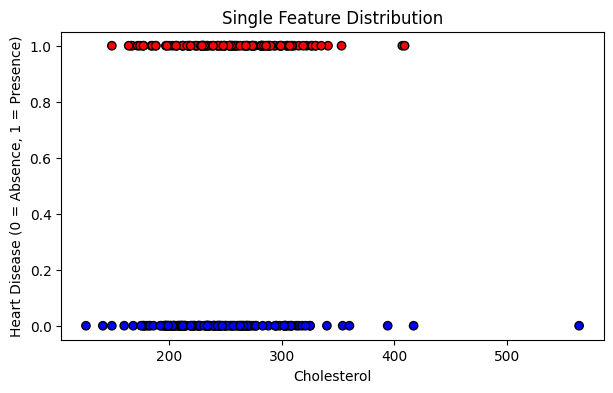

In [12]:
plt.figure(figsize=(7,4))
plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k')
plt.xlabel("Cholesterol")
plt.ylabel("Heart Disease (0 = Absence, 1 = Presence)")
plt.title("Single Feature Distribution")
plt.show()

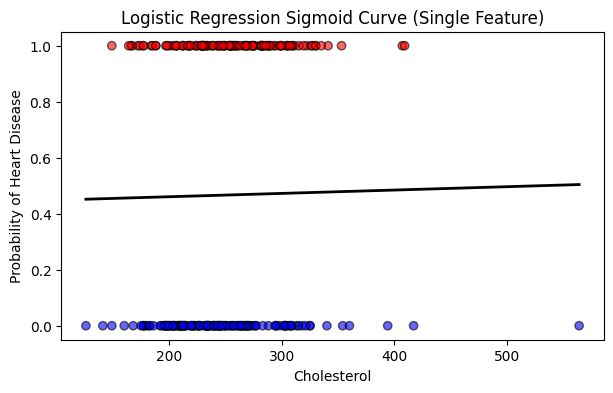

In [13]:
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
y_prob = model.predict_proba(X_range_scaled)[:, 1]
plt.figure(figsize=(7,4))
plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k', alpha=0.6)
plt.plot(X_range, y_prob, color='black', linewidth=2)
plt.xlabel("Cholesterol")
plt.ylabel("Probability of Heart Disease")
plt.title("Logistic Regression Sigmoid Curve (Single Feature)")
plt.show()

In [14]:
df = pd.read_csv("E:/Sulav/Program/AI lab/Lab1_Assignment/Heart_Disease_Prediction.csv")

In [15]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [16]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [17]:
df["Heart Disease"] = df["Heart Disease"].map({"Presence": 1, "Absence": 0})

In [18]:
X = df.drop("Heart Disease", axis=1).values
y = df["Heart Disease"].values


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
base_model = LogisticRegression(solver="saga", random_state=42)

In [22]:
param_grid = {
    "C": [0.01, 0.1, 1, 5, 10, 20],
    "solver": ["saga"],
    "l1_ratio": [0.0, 0.5, 1.0],
    "max_iter": [500, 1000, 2000]
}

In [23]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

In [24]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

In [25]:
grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...solver='saga')
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.1, ...], 'l1_ratio': [0.0, 0.5, ...], 'max_iter': [500, 1000, ...], 'solver': ['saga']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is d

In [26]:
print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Params: {'C': 0.1, 'l1_ratio': 0.0, 'max_iter': 500, 'solver': 'saga'}
Best CV Accuracy: 0.8277777777777778


In [27]:
best_model = grid.best_estimator_

In [28]:
y_pred = best_model.predict(X_test)

In [29]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8888888888888888

Confusion Matrix:
 [[43  7]
 [ 3 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90        50
           1       0.84      0.93      0.88        40

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90



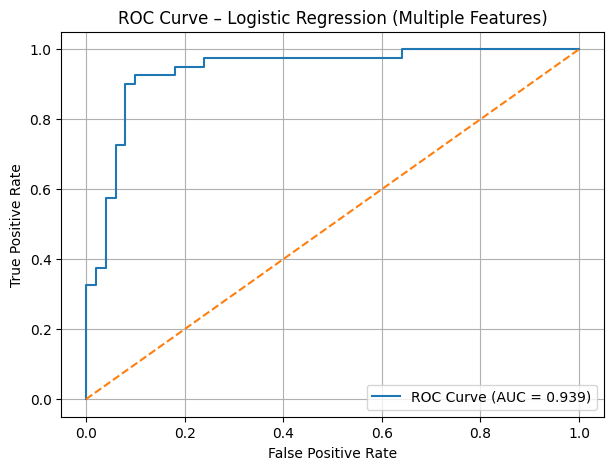

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for positive class
y_prob = best_model.predict_proba(X_test)[:, 1]

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression (Multiple Features)")
plt.legend()
plt.grid(True)
plt.show()

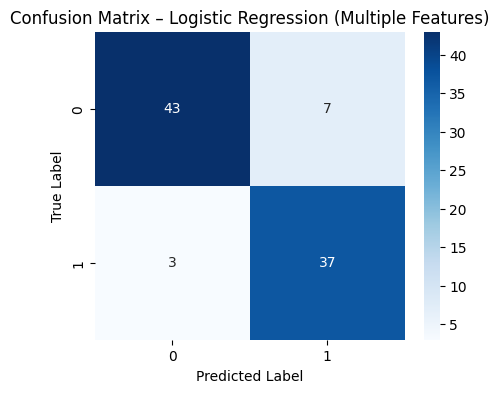

In [31]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Logistic Regression (Multiple Features)")
plt.show()

In [32]:
# Get feature names
feature_names = df.drop("Heart Disease", axis=1).columns

# Get coefficients
coefficients = best_model.coef_[0]

# Create DataFrame
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
11,Number of vessels fluro,0.651481
1,Sex,0.533783
2,Chest pain type,0.481689
12,Thallium,0.431356
8,Exercise angina,0.281466
9,ST depression,0.251040
10,Slope of ST,0.250653
3,BP,0.155202
4,Cholesterol,0.145982
6,EKG results,0.091567


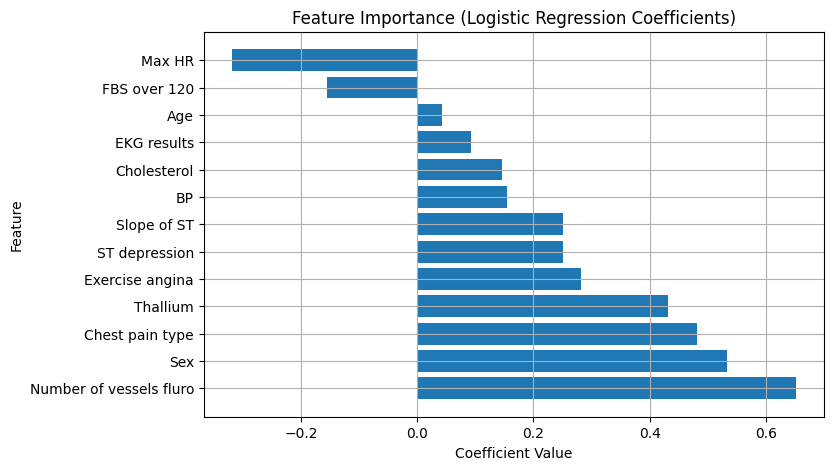

In [33]:
plt.figure(figsize=(8,5))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.grid(True)
plt.show()

Purpose of the various graphs that are used in Logistic Regression

Logistic Regression uses a variety of graphs, i.e., curves and plots in order to explain how it works and how well it performs.
    Some of them are explained as follows:

1) Sigmoid curve: It shows how the model converts input values into probabilities between 0 and 1. Unlike the perceptron, Logistic Regression does not make hard decisions; instead, it gives smooth probability outputs.

2) Decision boundary: It is the point where the predicted probability reaches a chosen threshold (usually 0.5). It shows how the model separates one class from another.

3) ROC curve: It measures performance at all possible thresholds by comparing the True Positive Rate with the False Positive Rate. This gives a broader view of the model's behavior than using a single threshold.

4) AUC score: It summarizes the ROC curve into one value. A higher AUC means the model is better at distinguishing between the two classes.

5) Confusion matrix: It shows how many predictions are correct and incorrect, helping identify where the model makes mistakes.

6) Feature coefficient plot: It explains how each feature affects the prediction. Positive values increase the chance of the positive class, while negative values decrease it.

Discussion

In this lab, we applied Logistic Regression to a heart disease dataset to understand the machine learning pipeline. The experiment was divided into two tasks: training the model using a single feature and using multiple features.

In Task 1, only Cholesterol was used as the input feature. The sigmoid function showed how the model converts inputs into probability values. However, using a single feature provided limited information, which caused overlapping classes and poor prediction performance.

In Task 2, multiple features were used, which significantly improved classification. Since the decision boundary could not be visualized, the model was evaluated using metrics such as the confusion matrix and ROC curve. GridSearchCV, which is a method used to automatically find the best combination of hyperparameters by performing cross-validation over a predefined grid, was applied to improve model generalization. Feature coefficients were also analyzed to understand the influence of each feature.

Conclusion

The results showed that the multi-feature model performed better than the single-feature model. This lab demonstrated the importance of using multiple features and tuning hyperparameters using GridSearchCV for building reliable medical prediction models.